In [1]:
# This notebook processes the Vcontact2 data, and looks at some numbers / statistics.

### Input files needed:
# - genome_by_genome_overview.csv: generated by vcontact2.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.stats import mannwhitneyu
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['svg.fonttype'] = 'none'
sns.set(font='arial')
sns.set_style("white")
sns.set_style("ticks")
%matplotlib inline

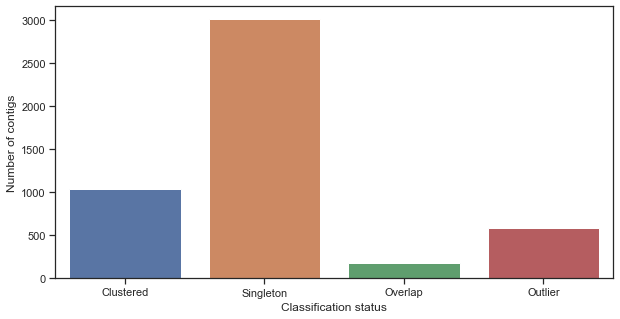

In [64]:
#plot basic vcontact stats.
#4842 contigs in input --> 4807 in output.
genomeoverview = pd.read_csv('data/genome_by_genome_overview.csv', sep=',', index_col=0)
genomeoverview['VCstatsred'] = genomeoverview['VC Status']
genomeoverview['VCstatsred'] = genomeoverview['VCstatsred'].str.replace('Overlap.*', 'Overlap', regex=True)
#Nodes:
nodesoverview = genomeoverview[genomeoverview['Genome'].str.contains("NODE")]
plt.figure(figsize=(10,5))
g = sns.countplot(nodesoverview['VCstatsred'])
g.set(xlabel='Classification status',ylabel="Number of contigs")
g.figure.savefig('figures/VCstats.png',dpi=300)

In [65]:
keepVCs = list(nodesoverview[nodesoverview['VC Status'] == 'Clustered']['VC'].unique())
#genomeoverview[genomeoverview['VC'].isin(keepVCs)]
vcdic = {}
for i in keepVCs:
    if sum('NODE' in s for s in list(genomeoverview[genomeoverview['VC'] == i]['Genome'])) < len(list(genomeoverview[genomeoverview['VC'] == i]['Genome'])):
        vcdic[i] = genomeoverview[genomeoverview['VC'] == i]

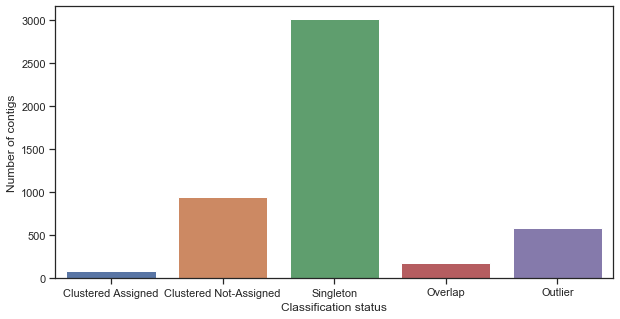

In [66]:
#plot basic vcontact stats --> Add additional panel with 'clustered with reference seqs.'
nodesoverview_clussanot = nodesoverview
nodesoverview_clussanot['VCstatsred_annot'] = nodesoverview_clussanot['VCstatsred']

nodesoverview_clussanot.loc[nodesoverview_clussanot['VC'].isin(vcdic.keys()), 'VCstatsred_annot'] = 'Clustered Assigned'
nodesoverview_clussanot.loc[nodesoverview_clussanot['VCstatsred_annot'] == 'Clustered', 'VCstatsred_annot'] = 'Clustered Not-Assigned'

plt.figure(figsize=(10,5))
g = sns.countplot(nodesoverview_clussanot['VCstatsred_annot'], order=['Clustered Assigned','Clustered Not-Assigned','Singleton','Overlap','Outlier'])
g.set(xlabel='Classification status',ylabel="Number of contigs")
g.figure.savefig('figures/VCstats.svg',dpi=300)

In [67]:
print('Clustered NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Clustered"])))
print('Singleton NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Singleton"])))
print('Overlap NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Overlap"])))
print('Outlier NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Outlier"])))
keepVCs = list(nodesoverview[nodesoverview['VC Status'] == 'Clustered']['VC'].unique())
print('Total number of clusters with NODES in: ' + str(len(keepVCs)))
pureNODEVC = 0
nameddfdic = {}
for i in keepVCs:
    tempdf = genomeoverview[genomeoverview['VC'] == i]
    lenclus = len(tempdf)
    counter = 0
    for j in list(tempdf['Genome']):
        if 'NODE' in j:
            counter += 1
    if counter == lenclus:
        pureNODEVC += 1
    if counter != lenclus:
        nameddfdic[i] = tempdf
print('Total clusters with only nodes: ' + str(pureNODEVC))
for i in nameddfdic:
    #print(list(nameddfdic[i][~nameddfdic[i]['Genome'].str.contains('NODE')]['Family']))
    print(i)
    print(nameddfdic[i]['Genome'])
    print(nameddfdic[i]['Family'])
    print(len(nameddfdic[i]))

Clustered NODES: 1034
Singleton NODES: 3010
Overlap NODES: 181
Outlier NODES: 582
Total number of clusters with NODES in: 403
Total clusters with only nodes: 368
123_0
61                     Azospirillum~phage~Cd
65    BP10_NODE_123_length_2866_cov_1_435701
Name: Genome, dtype: object
61    Siphoviridae
65      Unassigned
Name: Family, dtype: object
2
49_1
32                          Acinetobacter~phage~phiAC-1
47                           Aeromonas~phage~vB_AsaM-56
110              BP18_NODE_1_length_32522_cov_11_534304
882      BeeP-17-2013_NODE_8_length_19907_cov_39_552295
931      BeeP-25-2013_NODE_4_length_19295_cov_37_789104
955     BeeP-35-2013_NODE_10_length_26028_cov_14_780163
982      BeeP-35-2013_NODE_2_length_43720_cov_19_440918
1047     BeeP-37-2013_NODE_2_length_40678_cov_31_109505
1107     BeeP-45-2013_NODE_2_length_27560_cov_75_850817
1118     BeeP-47-2013_NODE_2_length_14142_cov_93_536438
1144     BeeP-49-2013_NODE_20_length_8038_cov_16_068333
1324                     

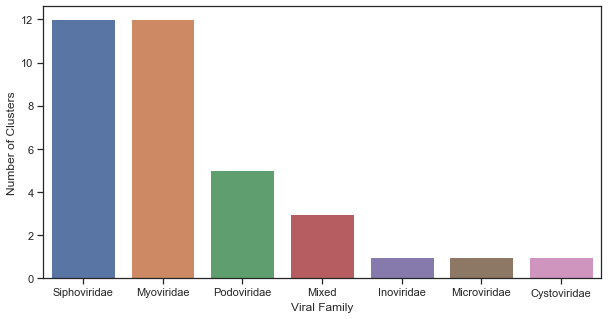

In [68]:
famnames = ["Siphoviridae","Myoviridae","Myoviridae","Podoviridae","Podoviridae","Myoviridae","Mixed","Siphoviridae","Siphoviridae","Myoviridae","Podoviridae","Siphoviridae","Siphoviridae","Myoviridae","Siphoviridae","Siphoviridae","Podoviridae","Inoviridae","Myoviridae","Myoviridae","Siphoviridae","Podoviridae","Myoviridae","Myoviridae","Myoviridae","Siphoviridae","Mixed","Siphoviridae","Myoviridae","Mixed","Siphoviridae","Siphoviridae","Microviridae","Myoviridae","Cystoviridae"]
plt.figure(figsize=(10,5))
g = sns.countplot(famnames)
g.set(xlabel="Viral Family",ylabel="Number of Clusters")
g.figure.savefig('figures/Cluster_names.svg',dpi=300)

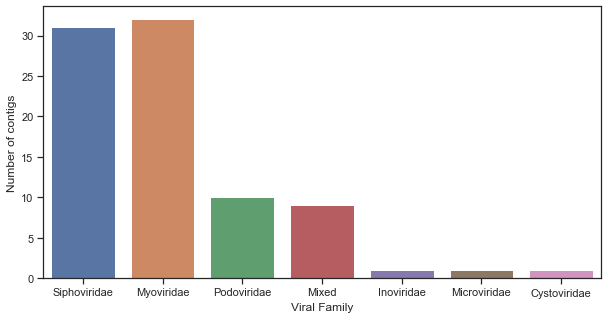

In [69]:
vcnamdic = {"123_0":"Siphoviridae","49_1":"Myoviridae","75_0":"Myoviridae","207_0":"Podoviridae","252_0":"Podoviridae","213_0":"Myoviridae","188_0":"Mixed","19_0":"Siphoviridae","103_0":"Siphoviridae","119_0":"Myoviridae","6_2":"Podoviridae","20_0":"Siphoviridae","54_0":"Siphoviridae","495_0":"Myoviridae","73_0":"Siphoviridae","292_0":"Siphoviridae","39_0":"Podoviridae","531_0":"Inoviridae","95_0":"Myoviridae","544_0":"Myoviridae","112_1":"Siphoviridae","57_0":"Podoviridae","558_0":"Myoviridae","59_12":"Myoviridae","386_0":"Myoviridae","293_0":"Siphoviridae","503_0":"Mixed","496_0":"Siphoviridae","461_0":"Myoviridae","54_1":"Mixed","71_0":"Siphoviridae","471_0":"Siphoviridae","284_0":"Microviridae","454_0":"Myoviridae","665_0":"Cystoviridae"}
vccountnamdic = {}
for i in nameddfdic:
    famnam = vcnamdic[i]
    if famnam not in vccountnamdic:
        vccountnamdic[famnam] = sum(nameddfdic[i]['Genome'].str.contains('NODE'))
    else:
        vccountnamdic[famnam] += sum(nameddfdic[i]['Genome'].str.contains('NODE'))
plt.figure(figsize=(10,5))
g = sns.barplot(x = list(vccountnamdic.keys()), y=list(vccountnamdic.values()))
g.set(xlabel="Viral Family",ylabel="Number of contigs")
g.figure.savefig('figures/Contig_names.svg',dpi=300)

In [8]:
lencut = []
for i in list(nodesoverview['Genome']):
    lencut.append(int(i.split('_')[4]))
nodesoverview['Length'] = lencut

In [15]:
nodesoverview[nodesoverview['Length'] > 5000]['VCstatsred'].value_counts()

Clustered    273
Outlier      126
Singleton     71
Overlap       67
Name: VCstatsred, dtype: int64

In [27]:
count_bigname = 0
for i in nameddfdic:
    for j in nameddfdic[i]['Genome']:
        if 'NODE' in j:
            if int(j.split('_')[4]) > 5000:
                count_bigname += 1
print('Of those contigs larger than 5kb: ' + str(count_bigname) + ' are named.')

Of those contigs larger than 5kb: 73 are named.


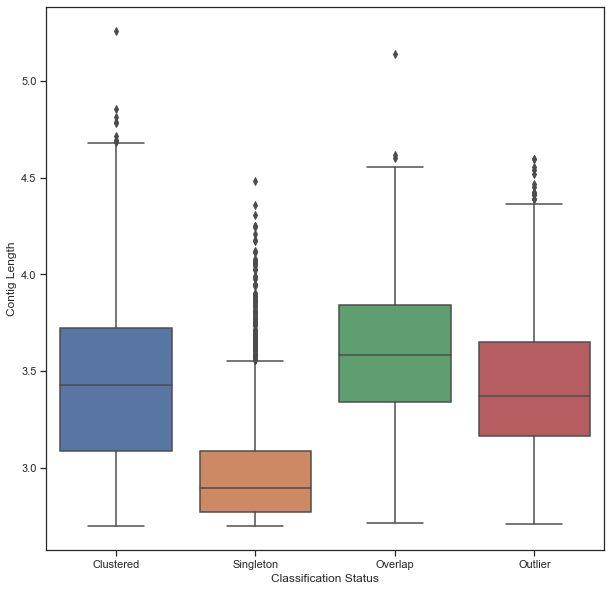

In [9]:
plt.figure(figsize=(10,10))
nodesoverview['Loglen'] = np.log10(nodesoverview['Length'])
g = sns.boxplot(x="VCstatsred", y="Loglen", data=nodesoverview)
g.set(xlabel="Classification Status",ylabel="Contig Length")
g.figure.savefig('figures/Class_statusVSlen.png',dpi=300)

In [10]:
# Test the significant difference between clustered length, and singleton length.
mannwhitneyu(nodesoverview[nodesoverview['VCstatsred'] == 'Clustered']['Length'], nodesoverview[nodesoverview['VCstatsred'] == 'Singleton']['Length'])

MannwhitneyuResult(statistic=544591.5, pvalue=2.014276632119638e-214)

In [9]:
### List of contigs containing antismash clusters:
antismash = ['BeeP-11-2013_NODE_10_length_45562_cov_39_780829', 'BeeP-11-2013_NODE_169_length_5958_cov_160_716545', 'BeeP-11-2013_NODE_890_length_1940_cov_18_632850', 'BeeP-38-2013_NODE_1_length_47472_cov_756_510180']
### Clusterstatus:

#genomeoverview[genomeoverview['Genome'].isin(antismash)]

### Family?

#for i in nameddfdic:
#    for j in list(nameddfdic[i]['Genome']):
#        if j in antismash:
#            print(nameddfdic[i])
#### so BeeP-38-2013_NODE_1_length_47472_cov_756_510180 is in a mixed cluster (myo & sipho)
#### And BeeP-11-2013_NODE_10_length_45562_cov_39_780829 is in a Siphoviridae cluster

### Other clusters?

#### For BeeP-11-2013_NODE_10_length_45562_cov_39_780829:
#genomeoverview[genomeoverview['VC'] == '54_0']
#### For BeeP-11-2013_NODE_169_length_5958_cov_160_716545:
#genomeoverview[genomeoverview['VC'] == '396_0']

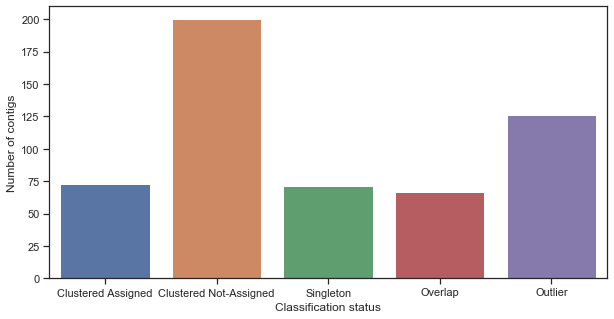

In [59]:
###################################################################################################################
#Additional plots for only nodes > 5000
#plot basic vcontact stats.
#4842 contigs in input --> 4807 in output.
genomeoverview = pd.read_csv('data/genome_by_genome_overview_5000.csv', sep=',', index_col=0)
genomeoverview['VCstatsred'] = genomeoverview['VC Status']
genomeoverview['VCstatsred'] = genomeoverview['VCstatsred'].str.replace('Overlap.*', 'Overlap', regex=True)
#Nodes:
nodesoverview = genomeoverview[genomeoverview['Genome'].str.contains("NODE")]
nodesoverview_clussanot = nodesoverview
nodesoverview_clussanot['VCstatsred_annot'] = nodesoverview_clussanot['VCstatsred']
nodesoverview_clussanot.loc[nodesoverview_clussanot['VC'].isin(vcdic.keys()), 'VCstatsred_annot'] = 'Clustered Assigned'
nodesoverview_clussanot.loc[nodesoverview_clussanot['VCstatsred_annot'] == 'Clustered', 'VCstatsred_annot'] = 'Clustered Not-Assigned'

plt.figure(figsize=(10,5))
g = sns.countplot(nodesoverview['VCstatsred_annot'], order=['Clustered Assigned','Clustered Not-Assigned','Singleton','Overlap','Outlier'])
g.set(xlabel='Classification status',ylabel="Number of contigs")
g.figure.savefig('figures/VCstats_5000.svg',dpi=300)

In [60]:
keepVCs = list(nodesoverview[nodesoverview['VC Status'] == 'Clustered']['VC'].unique())
#genomeoverview[genomeoverview['VC'].isin(keepVCs)]
vcdic = {}
for i in keepVCs:
    if sum('NODE' in s for s in list(genomeoverview[genomeoverview['VC'] == i]['Genome'])) < len(list(genomeoverview[genomeoverview['VC'] == i]['Genome'])):
        vcdic[i] = genomeoverview[genomeoverview['VC'] == i]

In [61]:
print('Clustered NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Clustered"])))
print('Singleton NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Singleton"])))
print('Overlap NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Overlap"])))
print('Outlier NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Outlier"])))
keepVCs = list(nodesoverview[nodesoverview['VC Status'] == 'Clustered']['VC'].unique())
print('Total number of clusters with NODES in: ' + str(len(keepVCs)))
pureNODEVC = 0
nameddfdic = {}
for i in keepVCs:
    tempdf = genomeoverview[genomeoverview['VC'] == i]
    lenclus = len(tempdf)
    counter = 0
    for j in list(tempdf['Genome']):
        if 'NODE' in j:
            counter += 1
    if counter == lenclus:
        pureNODEVC += 1
    if counter != lenclus:
        nameddfdic[i] = tempdf
print('Total clusters with only nodes: ' + str(pureNODEVC))
for i in nameddfdic:
    #print(list(nameddfdic[i][~nameddfdic[i]['Genome'].str.contains('NODE')]['Family']))
    print(i)
    print(nameddfdic[i]['Genome'])
    print(nameddfdic[i]['Family'])
    print(len(nameddfdic[i]))

Clustered NODES: 273
Singleton NODES: 71
Overlap NODES: 67
Outlier NODES: 126
Total number of clusters with NODES in: 153
Total clusters with only nodes: 122
49_1
32                          Acinetobacter~phage~phiAC-1
47                           Aeromonas~phage~vB_AsaM-56
1324                            Edwardsiella~phage~GF-2
110              BP18_NODE_1_length_32522_cov_11_534304
882      BeeP-17-2013_NODE_8_length_19907_cov_39_552295
931      BeeP-25-2013_NODE_4_length_19295_cov_37_789104
955     BeeP-35-2013_NODE_10_length_26028_cov_14_780163
982      BeeP-35-2013_NODE_2_length_43720_cov_19_440918
1047     BeeP-37-2013_NODE_2_length_40678_cov_31_109505
1107     BeeP-45-2013_NODE_2_length_27560_cov_75_850817
1118     BeeP-47-2013_NODE_2_length_14142_cov_93_536438
1144     BeeP-49-2013_NODE_20_length_8038_cov_16_068333
Name: Genome, dtype: object
32      Myoviridae
47      Myoviridae
1324    Myoviridae
110     Unassigned
882     Unassigned
931     Unassigned
955     Unassigned
982 

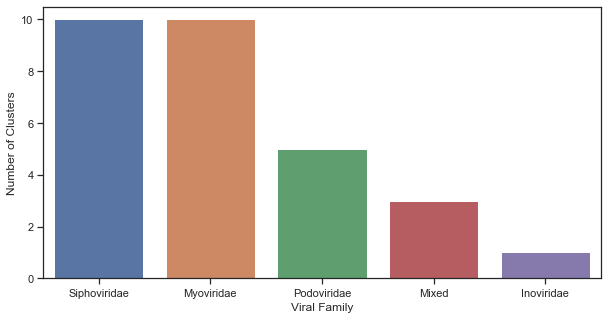

In [70]:
famnames_5000 = ['Myoviridae','Podoviridae','Podoviridae','Myoviridae','Mixed','Myoviridae','Siphoviridae','Myoviridae','Podoviridae','Siphoviridae','Siphoviridae','Siphoviridae','Siphoviridae','Podoviridae','Inoviridae','Myoviridae','Myoviridae','Siphoviridae','Podoviridae','Myoviridae','Myoviridae','Myoviridae','Siphoviridae','Mixed','Siphoviridae','Myoviridae','Mixed','Siphoviridae','Siphoviridae']
plt.figure(figsize=(10,5))
g = sns.countplot(famnames_5000, order=['Siphoviridae','Myoviridae','Podoviridae','Mixed','Inoviridae'])
g.set(xlabel="Viral Family",ylabel="Number of Clusters")
g.figure.savefig('figures/Cluster_names_5000.svg',dpi=300)

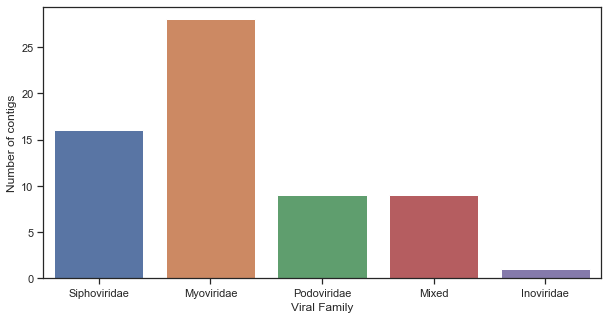

In [72]:
vcnamdic_5000 = {'49_1':'Myoviridae','207_0':'Podoviridae','252_0':'Podoviridae','213_0':'Myoviridae','188_0':'Mixed','75_0':'Myoviridae','103_0':'Siphoviridae','119_0':'Myoviridae','6_2':'Podoviridae','20_0':'Siphoviridae','73_0':'Siphoviridae','292_0':'Siphoviridae','39_0':'Podoviridae','531_0':'Inoviridae','95_0':'Myoviridae','544_0':'Myoviridae','112_1':'Siphoviridae','558_0':'Podoviridae','59_12':'Myoviridae','59_12':'Myoviridae','386_0':'Myoviridae','293_0':'Siphoviridae','503_0':'Mixed','496_0':'Siphoviridae','461_0':'Myoviridae','54_1':'Mixed','71_0':'Siphoviridae','471_0':'Siphoviridae'}
vccountnamdic = {}
for i in nameddfdic:
    if i in vcnamdic_5000:
        famnam = vcnamdic_5000[i]
        if famnam not in vccountnamdic:
            vccountnamdic[famnam] = sum(nameddfdic[i]['Genome'].str.contains('NODE'))
        else:
            vccountnamdic[famnam] += sum(nameddfdic[i]['Genome'].str.contains('NODE'))
plt.figure(figsize=(10,5))
g = sns.barplot(x = list(vccountnamdic.keys()), y=list(vccountnamdic.values()), order=['Siphoviridae','Myoviridae','Podoviridae','Mixed','Inoviridae'])
g.set(xlabel="Viral Family",ylabel="Number of contigs")
g.figure.savefig('figures/Contig_names_5000.svg',dpi=300)